# Notebook 18: The Bootstrap 
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [4]:
import numpy as np 
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

### Exercise 1 - Bootstrapped Confidence Intervals for the Mean 
*** 

In this exercise you will experiment with empirical bootstrap techniques to compute confidence intervals the mean of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Write down the expected value, variance, and standard deviation of $X \sim Exp(5)$.  You can look them up on [Wiki](https://en.wikipedia.org/wiki/Exponential_distribution) if you need to. 

**Solution**: We have 

$$
E[X] = \frac{1}{\lambda} = \frac{1}{5} = 0.2, \quad \textrm{Var}(X) = \frac{1}{\lambda^2} = \frac{1}{25} = 0.04, \quad \textrm{SD}(X) = \frac{1}{\lambda} = \frac{1}{5} = 0.2  
$$

**Part B**: The variable $\texttt{sample}$ below consists of $500$ samples from $Exp(5)$.  Complete the function bootstrapped_mean below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample}$ and compute a bootstrapped confidence interval for the mean at the 95% confidence level.  

In [6]:
sample = np.random.exponential(1/5, size=500)

array([0.18879559, 0.22341725])

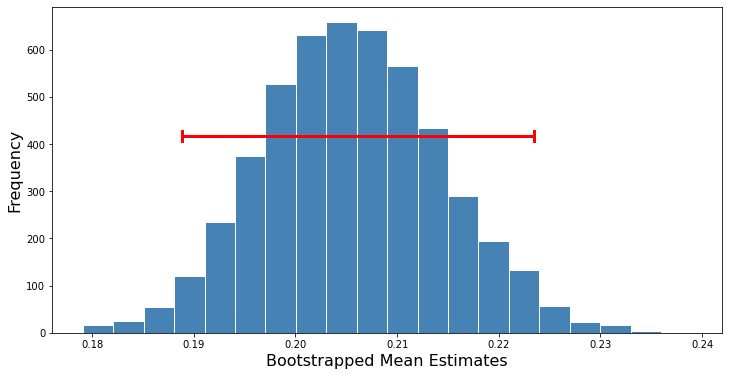

In [10]:
def bootstrapped_mean(sample, num_boots=5000):

    b = np.array([np.mean(np.random.choice(sample, replace=True, size=len(sample))) for ii in range(num_boots)])
    L, U = np.percentile(b, 2.5), np.percentile(b, 97.5)
    CI = np.array([L, U])

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(b).hist(ax=ax, color="steelblue", edgecolor="white", bins=20)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    
    return CI 
    
bootstrapped_mean(sample)

**Part C**: Use the sample mean of $\texttt{sample}$ and the known standard deviation of the distribution to compute a traditional 95% confidence interval for the mean of the distribution.  Compare your traditional confidence interval to the bootstrapped confidence interval returned by your code. 

**Solution**: We know that the standard deviation of the population is $\sigma = 1/\lambda = 0.2$.  At the 95% confidence level, the traditional confidence interval is 

In [ ]:
from scipy.stats import norm 
z = norm.ppf(0.975)
sig = 0.2 
CI = [np.mean(sample) + flip*z*sig/np.sqrt(len(sample)) for flip in [-1,1]]
print("Traditional 95% Confidence Interval: [{:.3f}, {:.3f}]".format(CI[0], CI[1]))

**Part D**: Modify the code you wrote in **Part B** to also plot a histogram of the bootstrapped sample means along with some graphical representation of the calculated confidence interval. 

### Exercise 2 - Bootstrapped Confidence Intervals for the Variance
*** 

In this exercise you will experiment with empirical bootstrap techniques to compute confidence intervals for various statistics of the variance of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Complete the function bootstrapped_var below, to draw at least $5000$ bootstrapped samples (with replacement) from the empirical distribution defined by $\texttt{sample}$ and compute a bootstrapped confidence interval for the variance at the 95% confidence level.  You should be able to copy paste your code from Exercise 1. Use your function to find the 95% bootstrapped CI for the data stored in $\texttt{sample}$ from Exercise 1. 

array([0.17386526, 0.21437061])

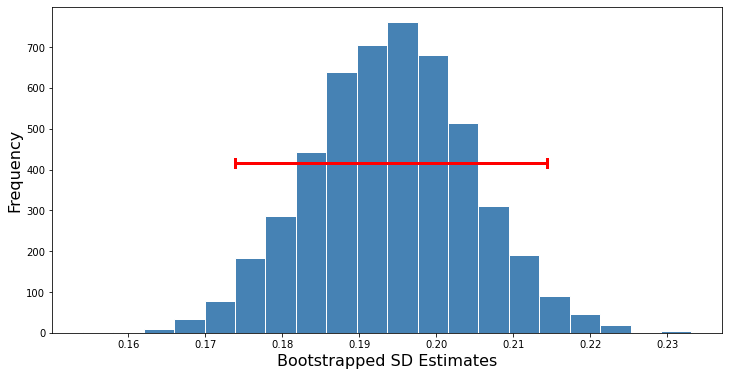

In [14]:
def bootstrapped_var(sample, num_boots=5000):

    b = np.array([np.std(np.random.choice(sample, replace=True, size=len(sample))) for ii in range(num_boots)])
    L, U = np.percentile(b, 2.5), np.percentile(b, 97.5)
    CI = np.array([L, U])

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(b).hist(ax=ax, color="steelblue", edgecolor="white", bins=20)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped SD Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    
    return CI 
    
bootstrapped_var(sample)

**Part B**: Does your 95% bootstrapped confidence interval cover the true variance of the population? 

### Exercise 3 - Empirical Coverage of Bootstrapped Confidence Intervals  
*** 

Complete the function CI_test below to test the coverage of the bootstrapped confidence intervals at the 95% confidence level for the mean of the population that $\texttt{sample}$ is drawn from.  Recall that you know that the true sample mean is $1/\lambda = 0.2$.  

In [ ]:
def CI_test(sample, num_CIs=100, num_boots=5000):
    return 1.0 

### Exercise 4 - Parametric Bootstrap for the Exponential Parameter 
*** 

In this exercise you will experiment with the parametric bootstrap technique to compute confidence intervals for various statistics of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Complete the function bootstrapped_lam below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample}$ and compute a bootstrapped confidence interval for the exponential parameter $\lambda$.  Recall from class that a good estimator for $\lambda$ is $1/x$ where $x$ is assumed to come from $Exp(\lambda)$. 

**Part B**: Complete the function parametric_stdev below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample}$.  From each bootstrapped resample, estimate the exponential parameter $\lambda$, then transform the estimate of $\lambda$ to the variance of the exponential distribution.  With your bootstrapped estimates of $\sigma$, compute a 95% confidence interval for the variance.  How does this confidence interval compared to the one computed in Exercise 2? 


In [ ]:
def parametric_stdev(sample, num_boots=5000):
    return np.array([0,1])
    
parametric_stdev(sample)